In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [98]:
np.random.seed(42)

In [99]:
df = pd.read_csv("housing.csv")

In [100]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [101]:
# Limpeza de dados
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype("category").cat.codes

In [102]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


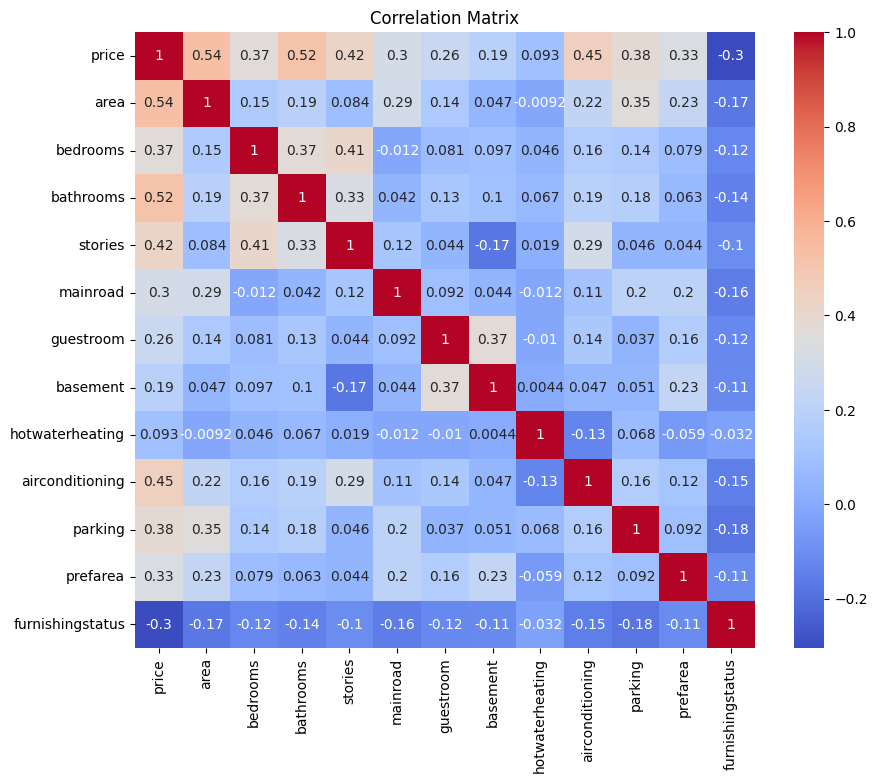

In [103]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Como podemos perceber, a maioria das variáveis com correlação de valor absoluto acima de 0.4 poderiam ser usadas como boas preditoras de preço. Porém, a maioria destas variáveis é categórica, o que dificulta a escolha de variáveis.

A boa variável para usar como preditora de preço seria a variável `area`.

In [104]:
corr_threshold = 0.4

features = [
    df.columns[idx] for idx, corr in enumerate(df.corr()["price"]) if abs(corr) > corr_threshold and df.columns[idx] != "price"
]

################################################################


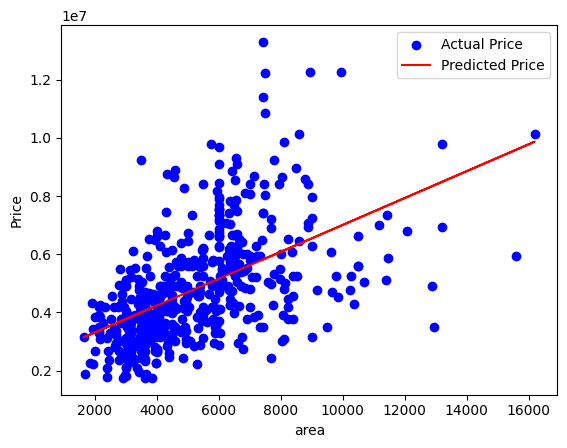

Este modelo é: Preço = 2.3873e+06 + 461.97X
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           7.39e-42
Time:                        13:49:04   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

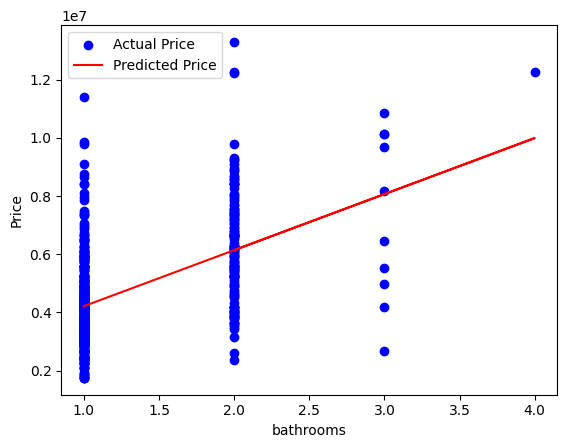

Este modelo é: Preço = 2.2887e+06 + 1.9266e+06X
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     198.7
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           1.14e-38
Time:                        13:49:04   Log-Likelihood:                -8558.6
No. Observations:                 545   AIC:                         1.712e+04
Df Residuals:                     543   BIC:                         1.713e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

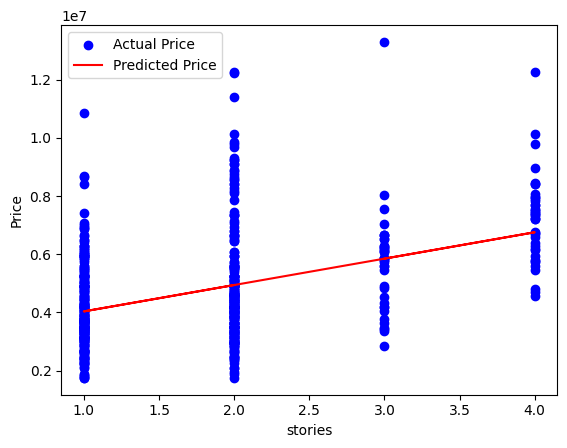

Este modelo é: Preço = 3.1289e+06 + 9.0712e+05X
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           8.67e-25
Time:                        13:49:04   Log-Likelihood:                -8590.5
No. Observations:                 545   AIC:                         1.718e+04
Df Residuals:                     543   BIC:                         1.719e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cons

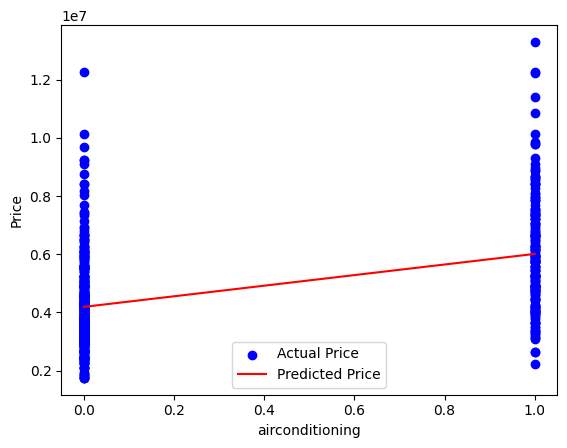

Este modelo é: Preço = 4.1919e+06 + 1.8213e+06X
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sat, 09 Mar 2024   Prob (F-statistic):           6.31e-29
Time:                        13:49:05   Log-Likelihood:                -8581.0
No. Observations:                 545   AIC:                         1.717e+04
Df Residuals:                     543   BIC:                         1.717e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [111]:
for feature in features:

    model = LinearRegression()

    X = df[[feature]]
    y = df["price"]

    # Fit the model to the data
    model.fit(X, y)
    print("################################################################")
    plt.scatter(X, y, color='blue', label='Actual Price')
    plt.plot(X, model.predict(X), color='red', label='Predicted Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    X = sm.add_constant(X)
    print("Este modelo é: Preço = {:.5} + {:.5}X".format(model.intercept_, model.coef_[0]))
    model = sm.OLS(y, X).fit()
    print(model.summary())
    print("################################################################")


Como pudemos ver, a variável `area` tem uma correlação de 0.54 com a variável `preco`, o que é um valor alto. Além disso, a variável é numérica, o que facilita a análise, sendo a única não-categórica do dataset.